### This notebook selects OG0000058 as the top protease inhibitor orthogroup postively associated with the detection suppression trait. 
Then, we use salivary expression data from female ticks to choose the top 10 highest expressed secreted members of OG0000058. 

#### Inputs:
Phylo profiling variable importance: ../datasheets/phylo_out/variable_importance_feature_selection_borda.csv \
Phylo profiling partial dependence plots: ../datasheets/phylo_out/explanation_pd_*_s.csv \
Full list of chelicerate proteins and orthogroups: 
../../25aacutoff_fullset_100223_annotated/all_chelicerate_proteins_annotated_plus_orthogroups_plus_clusters.csv \
Salivary gland expression from app: ../datasheets/genes_by_expression_female_x_salivary_gland.csv

#### Outputs:
List of 10 Amblyomma americanum genes from OG0000058 that are secreted and expressed in the female salivary gland: ../datasheets/Amblyomma-americanum_OG0000058_candidates.tsv

In [10]:
import pandas as pd
import arcadia_pycolor as apc
import matplotlib.pyplot as plt
import glob as glob
import seaborn as sns
pd.set_option('display.max_columns', None)
apc.mpl.setup()

### Selecting top orthogroups using phylo profiling data

In [2]:
#reading in csv of orthogroup ranking 
#TO DO FOR AB: fix paths to refer to emily's phylo out after merge
hit_ranking = pd.read_csv("../datasheets/phylo_out/variable_importance_feature_selection_borda.csv", sep = ";")
hit_ranking["orthogroup"] = hit_ranking["name"].apply(lambda x: x.split("_")[0])
hit_ranking.sort_values("score", ascending = False, inplace = True)



/Users/adairborges/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/adairborges/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/adairborges/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


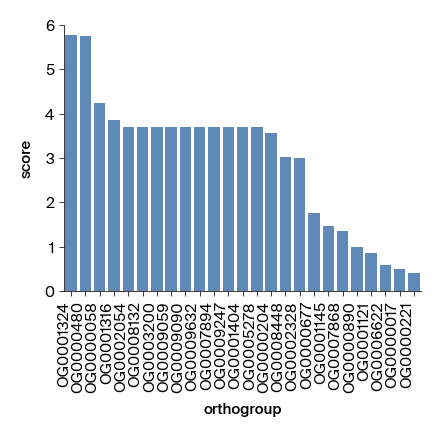

In [3]:
#making a barplot of the borda ranking scores of each orthogroup 
sns.barplot(x = 'orthogroup',
            y = 'score',
            data = hit_ranking, color=apc.aegean)
plt.xticks(rotation=90, ha='right')
plt.savefig("../outputs/variable_importance_feature_selection_borda_.pdf", bbox_inches="tight")


In [4]:
#just going to look at top hits, not all orthogroups 
hits = ["OG0000480", "OG0001324", "OG0000058"]

df_list = []
og_list = []
#reading in PD data from phyloprofiling 
#TO DO FOR AB: fix paths to refer to emily's phylo out after merge
for file in glob.glob('../datasheets/phylo_out/explanation_pd_*_s.csv'): 
    df = pd.read_csv(file, sep = ";").fillna("None")

    OG = file.split("pd_")[1].split("_s")[0]
    if OG in hits:

        og_list.append(OG)
    
        df["Orthogroup"] = OG
        df_list.append(df)

In [5]:
#concatting hits 
OG_pds = pd.concat(df_list)
OG_pds

,data_set,fs_method,learner,ensemble_model_name,positive_class,feature_x_value,probability,novelty,Orthogroup
0,development,lasso_binomial,lasso,ensemble.1.1,1,0.095308,0.777533,0.507525,OG0000480
1,development,lasso_binomial,lasso,ensemble.1.1,1,0.124191,0.756869,0.504304,OG0000480
2,development,lasso_binomial,lasso,ensemble.1.1,1,0.153819,0.736123,0.501417,OG0000480
3,development,lasso_binomial,lasso,ensemble.1.1,1,0.184534,0.715145,0.499034,OG0000480
4,development,lasso_binomial,lasso,ensemble.1.1,1,0.216679,0.692553,0.495968,OG0000480
...,...,...,...,...,...,...,...,...,...
95,validation,lasso_binomial,lasso,ensemble.1.1,1,6.081875,0.757970,0.505387,OG0001324
96,validation,lasso_binomial,lasso,ensemble.1.1,1,7.363983,0.760996,0.505559,OG0001324
97,validation,lasso_binomial,lasso,ensemble.1.1,1,8.768178,0.763043,0.505671,OG0001324
98,validation,lasso_binomial,lasso,ensemble.1.1,1,10.291649,0.764455,0.505793,OG0001324


In [6]:
#partial dependence plots can be made for either model development or model validation. We are choosing to look at validation
OG_pds_validation = OG_pds.loc[OG_pds["data_set"] == "validation"]

/Users/adairborges/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/adairborges/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/adairborges/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/adairborges/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

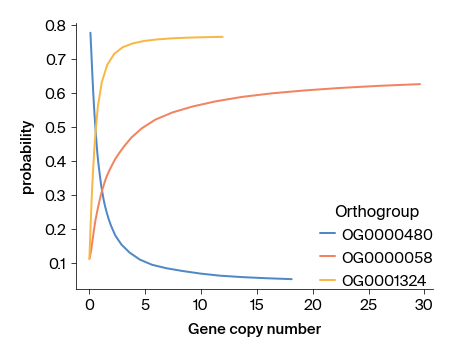

In [7]:
#making PD plots for the 3 orthogroups 
sns.lineplot(x="feature_x_value",y="probability",data=OG_pds_validation, hue = "Orthogroup")

plt.xlabel('Gene copy number')
plt.savefig("../outputs/hits_validation_pd_plots.pdf", bbox_inches="tight")
plt.show()

### Looking at annotations for top hits OG0001324, OG0000058, and OG0000480
#### OG0001324 = IL-17 like (not protease inhibitors)
#### OG0000058 = TIL domain protease inhibitors 
#### OG0000480 = alpha-2-macroglobulin protease inhibitors




In [31]:
#reading in high confidence protease inhibitor orthogroups
HQ_num_df_filtered = pd.read_csv("../datasheets/PI_orthogroups_high_qual_06112023.tsv", sep = "\t")
HQ_num_df_filtered["confidence"] = "high confidence"

In [32]:
#reading in low confidence protease inhibitor orthogroups
LQ_num_df_filtered = pd.read_csv("../datasheets/PI_orthogroups_low_qual_06112023.tsv", sep = "\t")
LQ_num_df_filtered["confidence"] = "low confidence"

In [33]:
#combining into one df since we analyzed them together anyway
input_orthogroups = pd.concat([HQ_num_df_filtered, LQ_num_df_filtered])

In [8]:
#reading in file that has all annotations for all chelicerate proteins
all_df = pd.read_csv("../../25aacutoff_fullset_100223_annotated/all_chelicerate_proteins_annotated_plus_orthogroups_plus_clusters.csv")

In [57]:
#subsetting to OG0001324: From low confidence PI cluster, Egg has no annotation, and there is no KO annotation that passes the threshold. 
#However, these proteins consistently get below-treshold annotations as IL-17 like proteins!
OG1324 = all_df.loc[all_df["Orthogroup"] == "OG0001324"]

#adding in data from input orthogroups
OG1324 = OG1324.merge(input_orthogroups, on = "Orthogroup", how = "left")

print(OG1324.value_counts("PI_cluster")) 
print(OG1324.value_counts("confidence")) 
print(OG1324.value_counts("egg_Description").head(3)) 
print(OG1324.value_counts("KO_pass").head(3) )
print(OG1324.value_counts("KO_definition").head(3) )

PI_cluster
{nan, 'BadTM-Kazal-IGF'}    72
Name: count, dtype: int64
confidence
low confidence    72
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
KO_pass
nan;nan;nan;nan;nan    64
nan;nan;nan             1
nan;nan;nan;nan         1
Name: count, dtype: int64
KO_definition
interleukin 17C;interleukin 17F;interleukin 17E;interleukin 17B;interleukin 17D    7
interleukin 17C;interleukin 17F;interleukin 17E;interleukin 17D;interleukin 17B    5
interleukin 17C;interleukin 17F;interleukin 17E;interleukin 17D;interleukin 17A    4
Name: count, dtype: int64


In [55]:
#subsetting to OG0000058: From high confidence PI cluster annotated as trypsin inhibitor like protease inhibitors
OG0000058 = all_df.loc[all_df["Orthogroup"] == "OG0000058"]

#adding in data from input orthogroups
OG0000058 = OG0000058.merge(input_orthogroups, on = "Orthogroup", how = "left")

print(OG0000058.value_counts("PI_cluster")) 
print(OG0000058.value_counts("confidence")) 
print(OG0000058.value_counts("egg_Description").head(3)) 
print(OG0000058.value_counts("KO_pass").head(3) )
print(OG0000058.value_counts("KO_definition").head(3) )

PI_cluster
{'TIL', nan}    458
Name: count, dtype: int64
confidence
high confidence    458
Name: count, dtype: int64
egg_Description
Trypsin Inhibitor like cysteine rich domain    92
Cysteine-rich venom protein                    85
calcium ion binding                             5
Name: count, dtype: int64
KO_pass
nan;nan;nan;nan;nan    316
nan;nan;nan;nan         45
nan;nan;nan             38
Name: count, dtype: int64
KO_definition
zonadhesin;von Willebrand factor;alpha-tectorin;SCO-spondin;mucin-6/19    4
Bardet-Biedl syndrome 9 protein                                           4
zonadhesin;von Willebrand factor;SCO-spondin;alpha-tectorin;mucin-6/19    4
Name: count, dtype: int64


In [56]:
#subsetting to OG0000480: From low confidence PI cluster, Egg and KO agree that it is likely an alpha-2-macroglobulin protease inhibitor
OG0000480 = all_df.loc[all_df["Orthogroup"] == "OG0000480"]

#adding in data from input orthogroups
OG0000480 = OG0000480.merge(input_orthogroups, on = "Orthogroup", how = "left")

print(OG0000480.value_counts("PI_cluster")) 
print(OG0000480.value_counts("confidence")) 
print(OG0000480.value_counts("egg_Description").head(3)) 
print(OG0000480.value_counts("KO_pass").head(3) )
print(OG0000480.value_counts("KO_definition").head(3) )

PI_cluster
{'BadTM-Kazal-A2M', nan}    132
Name: count, dtype: int64
confidence
low confidence    132
Name: count, dtype: int64
egg_Description
endopeptidase inhibitor activity    85
Alpha-2-Macroglobulin               35
A-macroglobulin receptor             6
Name: count, dtype: int64
KO_pass
nan;nan;nan;nan;nan    108
nan;nan                  5
nan;nan;nan              5
Name: count, dtype: int64
KO_definition
CD109 antigen;alpha-2-macroglobulin-like protein;alpha-2-macroglobulin;pregnancy zone protein;complement component 4    11
CD109 antigen;alpha-2-macroglobulin-like protein;pregnancy zone protein;alpha-2-macroglobulin;complement component 4     9
CD109 antigen                                                                                                            8
Name: count, dtype: int64


### Evaluating salivary gland expression for OG0000058, the highest postively scoring protease inhibitor family 

In [40]:
#reading in salivary gland expression levels in female Amblyomma americanum ticks
fem_sal = pd.read_csv("../datasheets/genes_by_expression_female_x_salivary_gland.csv")


In [46]:
#merge 
OG58_salex = OG58.merge(fem_sal, left_on = "gene_name", right_on = "gene", how = "left")


In [47]:
#only moving forward with secreted proteins that are sometimes or always expressed in female salivary gland
targets = OG58_salex.loc[(OG58_salex["expression_category"] == "always") | (OG58_salex["expression_category"] == "sometimes") ]
secreted_targets = targets.loc[targets["deepsig_feature"] == "Signal peptide"]

Text(0.5, 0, 'Expression in female salivary gland: max_vst')

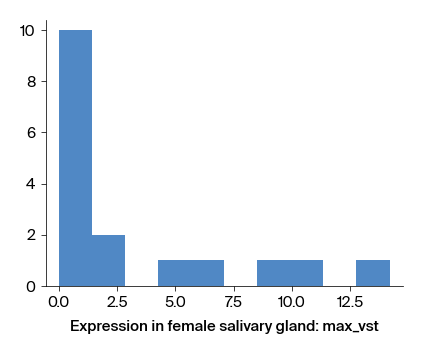

In [48]:
#plotting out relative expression levels of selected genes
plt.hist(secreted_targets["max_vst"])
plt.xlabel("Expression in female salivary gland: max_vst")

In [49]:
#getting rid of the lowest expressed proteins (max_vst is less than 1) 
secreted_targets_58 = secreted_targets.loc[secreted_targets["max_vst"]>1]
len(secreted_targets_58)

10

### This filtering leaves us with 10 secreted salivary expressed trypsin like inhibitors from Amblyomma americanum
#### Writing out: "../datasheets/Amblyomma-americanum_OG0000058_candidates.tsv"

In [50]:
#this leaves us with 10 genes
secreted_targets_58["gene_name"]

426     Amblyomma-americanum_evm.model.contig-94090-1.4
429     Amblyomma-americanum_evm.model.contig-76089-1.2
431      Amblyomma-americanum_evm.model.contig-8661-1.1
435     Amblyomma-americanum_evm.model.contig-30987-1.8
437    Amblyomma-americanum_evm.model.contig-128153-1.1
439    Amblyomma-americanum_evm.model.contig-234199-1.1
440    Amblyomma-americanum_evm.model.contig-240510-1.2
447    Amblyomma-americanum_evm.model.contig-114817-1.1
448    Amblyomma-americanum_evm.model.contig-195898-1.1
450    Amblyomma-americanum_evm.model.contig-48378-1.17
Name: gene_name, dtype: object

In [53]:
#writing out 
secreted_targets_58[["gene_name", "Orthogroup","deepsig_start",	"deepsig_end"]].to_csv("../datasheets/Amblyomma-americanum_OG0000058_candidates.tsv", sep = "\t", index = False)